In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# Load and combine all CSV files
def load_all_datasets():
    """Load all CSV files from the Dataset folder and combine them into a single DataFrame"""
    
    # Get all CSV files in the Dataset folder
    csv_files = glob.glob('Dataset/batch*.csv')
    print(f"Found {len(csv_files)} CSV files: {sorted(csv_files)}")
    
    # List to store all dataframes
    dataframes = []
    
    # Load each CSV file
    for file in csv_files:
        df = pd.read_csv(file)
        print(f"Loaded {file}: {df.shape}")
        dataframes.append(df)
    
    # Combine all dataframes
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"\nCombined dataset shape: {combined_df.shape}")
    
    return combined_df

# Load the combined dataset
df = load_all_datasets()

Found 10 CSV files: ['Dataset\\batch1.csv', 'Dataset\\batch10.csv', 'Dataset\\batch2.csv', 'Dataset\\batch3.csv', 'Dataset\\batch4.csv', 'Dataset\\batch5.csv', 'Dataset\\batch6.csv', 'Dataset\\batch7.csv', 'Dataset\\batch8.csv', 'Dataset\\batch9.csv']
Loaded Dataset\batch1.csv: (445, 129)
Loaded Dataset\batch10.csv: (3600, 129)
Loaded Dataset\batch2.csv: (1244, 129)
Loaded Dataset\batch3.csv: (1586, 129)
Loaded Dataset\batch4.csv: (161, 129)
Loaded Dataset\batch5.csv: (197, 129)
Loaded Dataset\batch6.csv: (2300, 129)
Loaded Dataset\batch7.csv: (3613, 129)
Loaded Dataset\batch8.csv: (294, 129)
Loaded Dataset\batch9.csv: (470, 129)

Combined dataset shape: (13910, 129)


In [3]:
# Explore the combined dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nDataset statistics:")
print(df.describe())

print(f"\nLabel distribution:")
print(df['label'].value_counts())

print(f"\nMissing values:")
print(df.isnull().sum().sum())

Dataset Info:
Shape: (13910, 129)
Columns: ['label', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'fea

In [4]:
# Prepare data for training
# Separate features and target
X = df.drop('label', axis=1)  # Features (feature_1 to feature_128)
y = df['label']  # Target variable

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Testing target distribution:\n{y_test.value_counts()}")

Features shape: (13910, 128)
Target shape: (13910,)

Training set: (11128, 128)
Testing set: (2782, 128)
Training target distribution:
label
5    2407
2    2341
1    2052
4    1549
6    1466
3    1313
Name: count, dtype: int64
Testing target distribution:
label
5    602
2    585
1    513
4    387
6    367
3    328
Name: count, dtype: int64


In [5]:
# Train Random Forest Model
print("Training Random Forest Classifier...")

# Initialize the Random Forest model with good parameters
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split
    min_samples_leaf=2,    # Minimum samples in leaf
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all available cores
    class_weight='balanced' # Handle class imbalance if any
)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training completed!")
print(f"Number of features: {rf_model.n_features_in_}")
print(f"Number of classes: {rf_model.n_classes_}")
print(f"Classes: {rf_model.classes_}")

Training Random Forest Classifier...
Model training completed!
Number of features: 128
Number of classes: 6
Classes: [1 2 3 4 5 6]


In [6]:
# Make predictions and evaluate the model
print("Making predictions...")

# Make predictions on training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

Making predictions...
Training Accuracy: 0.9990
Testing Accuracy: 0.9946

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       513
           2       0.99      1.00      1.00       585
           3       1.00      0.99      0.99       328
           4       0.99      0.99      0.99       387
           5       0.99      1.00      0.99       602
           6       0.99      1.00      1.00       367

    accuracy                           0.99      2782
   macro avg       1.00      0.99      0.99      2782
weighted avg       0.99      0.99      0.99      2782


Confusion Matrix (Test Set):
[[508   3   0   1   1   0]
 [  0 585   0   0   0   0]
 [  0   0 324   0   4   0]
 [  0   0   0 385   2   0]
 [  0   1   0   0 599   2]
 [  0   0   0   1   0 366]]


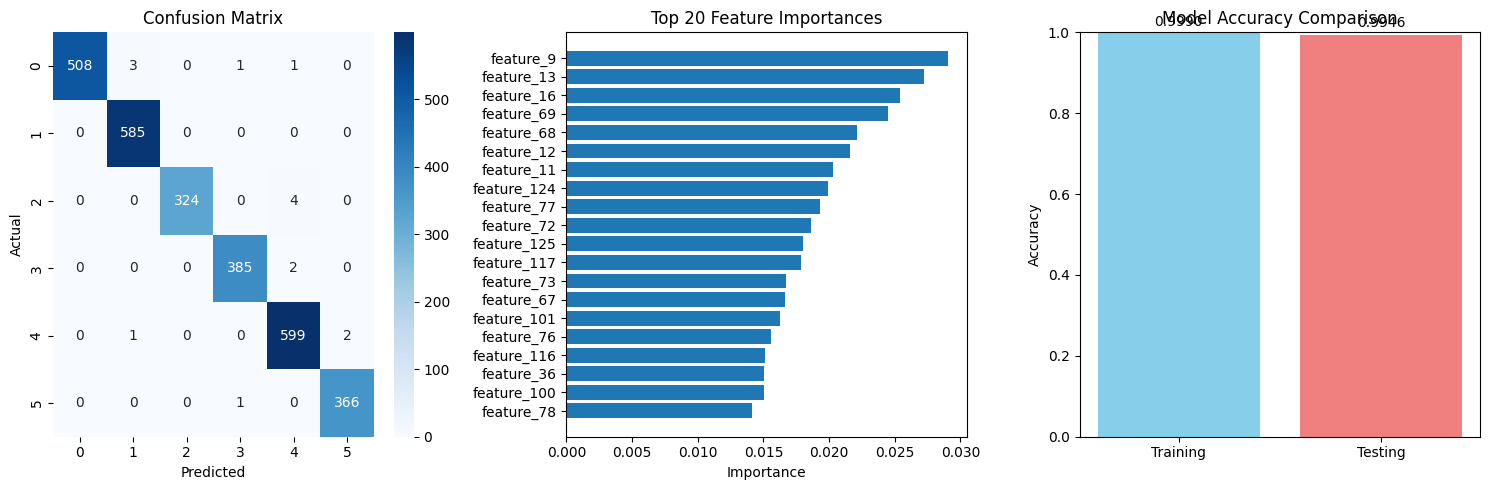

In [7]:
# Visualize results
plt.figure(figsize=(15, 5))

# Plot 1: Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 2: Feature Importance (Top 20)
plt.subplot(1, 3, 2)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()

# Plot 3: Accuracy Comparison
plt.subplot(1, 3, 3)
accuracies = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing']
colors = ['skyblue', 'lightcoral']
plt.bar(labels, accuracies, color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
# Display feature importance details
print("Top 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

print(f"\nTotal features with non-zero importance: {(rf_model.feature_importances_ > 0).sum()}")
print(f"Features with importance > 0.01: {(rf_model.feature_importances_ > 0.01).sum()}")
print(f"Features with importance > 0.005: {(rf_model.feature_importances_ > 0.005).sum()}")

Top 20 Most Important Features:
    feature  importance
  feature_9    0.029039
 feature_13    0.027222
 feature_16    0.025428
 feature_69    0.024486
 feature_68    0.022127
 feature_12    0.021626
 feature_11    0.020264
feature_124    0.019952
 feature_77    0.019325
 feature_72    0.018655
feature_125    0.018046
feature_117    0.017892
 feature_73    0.016726
 feature_67    0.016644
feature_101    0.016297
 feature_76    0.015600
feature_116    0.015121
 feature_36    0.015072
feature_100    0.015037
 feature_78    0.014155

Total features with non-zero importance: 128
Features with importance > 0.01: 37
Features with importance > 0.005: 71


In [9]:
# Save the trained model
model_filename = 'coal_mine_rf_model.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved as '{model_filename}'")

# Save feature names for future use
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("Feature names saved as 'feature_names.pkl'")

# Save the scaler if we used one (for future reference)
print(f"Model training completed successfully!")
print(f"Final test accuracy: {test_accuracy:.4f}")
print(f"Model uses {len(feature_names)} features from {len(csv_files)} CSV files")

Model saved as 'coal_mine_rf_model.pkl'
Feature names saved as 'feature_names.pkl'
Model training completed successfully!
Final test accuracy: 0.9946


NameError: name 'csv_files' is not defined